EDA - Análisis exploratorios de datos

In [ ]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_siniestros.csv to df_siniestros.csv
Saving df_victimas.csv to df_victimas.csv
Saving df_hechos.csv to df_hechos.csv


Examinamos las primeras filas del dataframe para entender la estructura

In [ ]:
df_siniestros = pd.read_csv('df_siniestros.csv')

In [ ]:
df_siniestros.head()

,Id,Nro Victimas,Fecha,Año,Mes,Dia,Hora,Franja Horaria,Lugar,Tipo Calle,...,Longitud,Latitud,Participantes,Victima,Acusado,DiaSemana,MomentoDia,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Viernes,Madrugada,CONDUCTOR,MASCULINO,19.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,Madrugada,CONDUCTOR,MASCULINO,70.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Domingo,Mañana,CONDUCTOR,MASCULINO,30.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,Domingo,Madrugada,CONDUCTOR,MASCULINO,18.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves,Madrugada,CONDUCTOR,MASCULINO,29.0


In [ ]:
df_siniestros.shape

(707, 24)

In [ ]:
df_siniestros.columns

Index(['Id', 'Nro Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Franja Horaria', 'Lugar', 'Tipo Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Longitud', 'Latitud',
       'Participantes', 'Victima', 'Acusado', 'DiaSemana', 'MomentoDia', 'Rol',
       'Sexo', 'Edad'],
      dtype='object')

Se verifican los tipos de datos de las variables

In [ ]:
df_siniestros.dtypes

Id                        object
Nro Victimas               int64
Fecha                     object
Año                        int64
Mes                        int64
Dia                        int64
Hora                      object
Franja Horaria             int64
Lugar                     object
Tipo Calle                object
Calle                     object
Cruce                     object
Dirección Normalizada     object
Comuna                     int64
Longitud                 float64
Latitud                  float64
Participantes             object
Victima                   object
Acusado                   object
DiaSemana                 object
MomentoDia                object
Rol                       object
Sexo                      object
Edad                     float64
dtype: object

Chequeamos valores nulos y faltantes

In [ ]:
columnas_sd_dicc = {}

for columna in df_siniestros.columns:
    cantidad = (df_siniestros[columna] == 'SD').sum()
    columnas_sd_dicc[columna] = cantidad

for columna, conteo in columnas_sd_dicc.items():
    print(f"Columna '{columna}': {conteo} veces que aparece 'SD'")

Columna 'Id': 0 veces que aparece 'SD'
Columna 'Nro Victimas': 0 veces que aparece 'SD'
Columna 'Fecha': 0 veces que aparece 'SD'
Columna 'Año': 0 veces que aparece 'SD'
Columna 'Mes': 0 veces que aparece 'SD'
Columna 'Dia': 0 veces que aparece 'SD'
Columna 'Hora': 0 veces que aparece 'SD'
Columna 'Franja Horaria': 0 veces que aparece 'SD'
Columna 'Lugar': 0 veces que aparece 'SD'
Columna 'Tipo Calle': 0 veces que aparece 'SD'
Columna 'Calle': 0 veces que aparece 'SD'
Columna 'Cruce': 0 veces que aparece 'SD'
Columna 'Dirección Normalizada': 0 veces que aparece 'SD'
Columna 'Comuna': 0 veces que aparece 'SD'
Columna 'Longitud': 0 veces que aparece 'SD'
Columna 'Latitud': 0 veces que aparece 'SD'
Columna 'Participantes': 0 veces que aparece 'SD'
Columna 'Victima': 8 veces que aparece 'SD'
Columna 'Acusado': 20 veces que aparece 'SD'
Columna 'DiaSemana': 0 veces que aparece 'SD'
Columna 'MomentoDia': 0 veces que aparece 'SD'
Columna 'Rol': 0 veces que aparece 'SD'
Columna 'Sexo': 2 veces

In [ ]:
df_siniestros.isnull().sum()

Id                       0
Nro Victimas             0
Fecha                    0
Año                      0
Mes                      0
Dia                      0
Hora                     0
Franja Horaria           0
Lugar                    0
Tipo Calle               0
Calle                    0
Cruce                    0
Dirección Normalizada    0
Comuna                   0
Longitud                 0
Latitud                  0
Participantes            0
Victima                  0
Acusado                  0
DiaSemana                0
MomentoDia               0
Rol                      0
Sexo                     0
Edad                     2
dtype: int64

## Estadisticas descriptivas basicas

Variables cuantitativas


In [ ]:
df_siniestros.describe()

,Nro Victimas,Año,Mes,Dia,Franja Horaria,Comuna,Longitud,Latitud,Edad
count,707.000000,707.00000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,705.000000
mean,1.059406,2018.18529,6.695898,15.916549,11.567185,7.431400,-58.441645,-34.619662,42.068085
std,0.253879,1.66990,3.579454,8.655516,6.678319,4.374699,0.046398,0.035352,19.269350
min,1.000000,2016.00000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.00000,4.000000,9.000000,6.000000,4.000000,-58.476776,-34.643980,28.000000
50%,1.000000,2018.00000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622882,36.000000
75%,1.000000,2019.00000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596991,55.000000
max,3.000000,2021.00000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000


Conclusiones:

Datos Generales:
Contamos con 707 registros y 25 columnas.
Las columnas relevantes incluyen información sobre el accidente, las víctimas, la ubicación, y detalles temporales como la fecha y hora.

Nulos y Valores Específicos:
Hay celdas con el valor 'SD' en las columnas 'Id', 'Victima', 'Acusado', 'Sexo' y 'Fecha_fallecimiento'.
En algunas columnas, como 'Edad' y 'Fecha_fallecimiento', encontramos valores nulos que pueden necesitar tratamiento.

Características Temporales:
Los accidentes parecen estar distribuidos de manera uniforme a lo largo de los años, meses y días, con un promedio de 1.06 víctimas por accidente.

Ubicación y Franja Horaria:
La mayoría de los accidentes ocurren en la franja horaria entre las 6:00 y las 23:00 horas.
La comuna más afectada es la número 7 (Flores y Chacabuco).

Edad:
La edad promedio de las víctimas es de aproximadamente 42 años.

Visualizacion de datos

In [ ]:
df_siniestros["Edad"].describe()

count    705.000000
mean      42.068085
std       19.269350
min        1.000000
25%       28.000000
50%       36.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

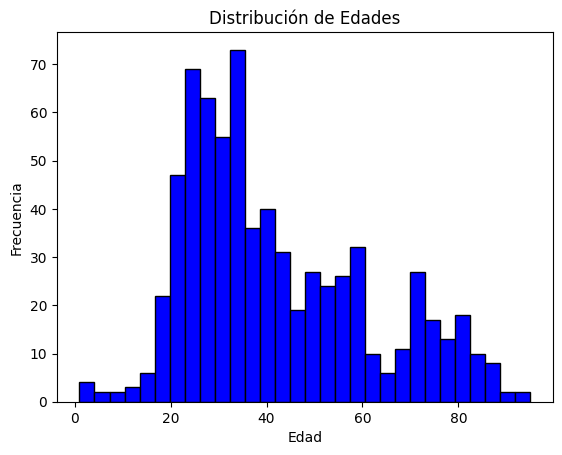

In [ ]:
plt.hist(df_siniestros["Edad"].dropna(), bins=30, edgecolor='black', color="blue")
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

La estadística revela que la mayoría de las víctimas de incidentes viales tienen entre 20 y 40 años.

## Numero de victimas

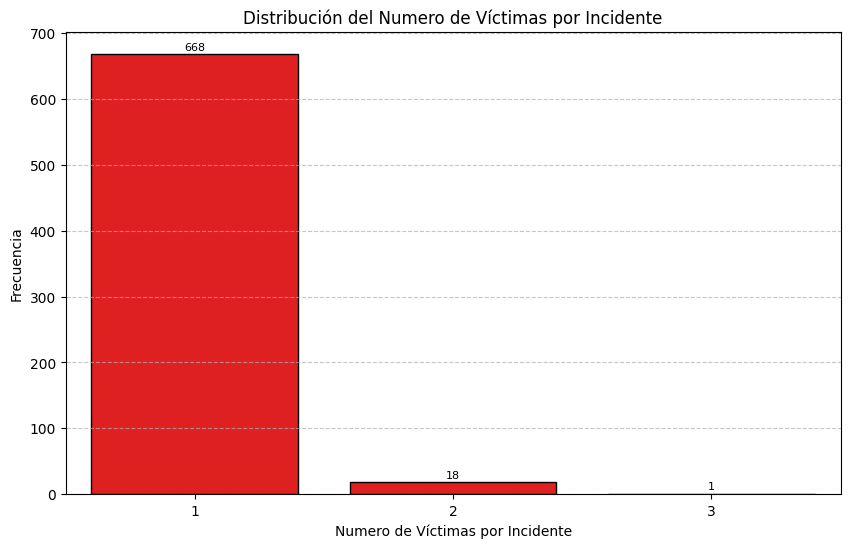

In [ ]:
victimas_counts = df_siniestros.groupby("Id")["Nro Victimas"].max().value_counts().sort_index()

plt.figure(figsize=(10, 6))
a1= sns.barplot(x=victimas_counts.index, y=victimas_counts.values, color="red", edgecolor="black")
plt.title("Distribución del Numero de Víctimas por Incidente")
plt.xlabel("Numero de Víctimas por Incidente")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in a1.patches:
    a1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

668 casos involucran a una sola persona. Luego tenemos 18 casos con dos personas y 1 caso donde las víctimas son 3 personas.

## Mes

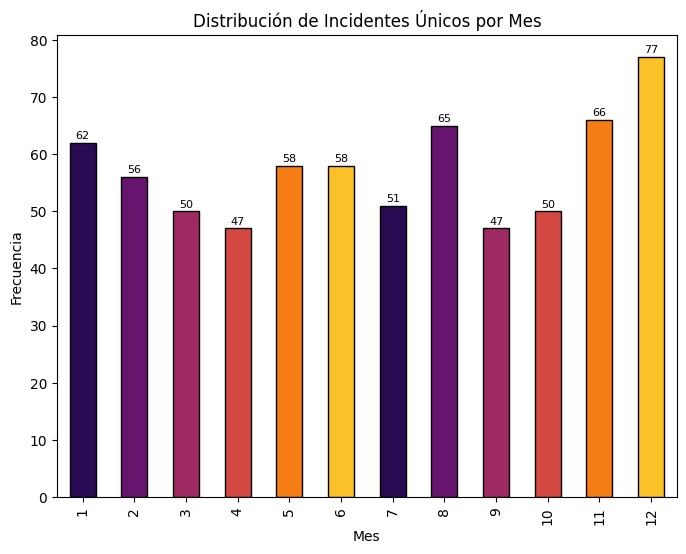

In [ ]:
incidentes_por_mes = df_siniestros.groupby("Mes")["Id"].nunique()

plt.figure(figsize=(8, 6))
a2= incidentes_por_mes.plot(kind="bar", color=sns.color_palette("inferno"), edgecolor="black")
plt.title("Distribución de Incidentes Únicos por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
for p in a2.patches:
    a2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
total_incidentes_mes = np.sum(incidentes_por_mes)
porcentajes_mes = (incidentes_por_mes/ total_incidentes_mes) * 100

df_mes = pd.DataFrame({
    'MES': incidentes_por_mes.index,
    'Frecuencia': incidentes_por_mes.values,
    'Porcentaje': porcentajes_mes.values
})

df_mes

,MES,Frecuencia,Porcentaje
0,1,62,9.024745
1,2,56,8.151383
2,3,50,7.278020
3,4,47,6.841339
4,5,58,8.442504
5,6,58,8.442504
6,7,51,7.423581
7,8,65,9.461426
8,9,47,6.841339
9,10,50,7.278020


En diciembre sucedieron la mayor cantidad de casos, y en abril la menor cantidad de casos.

## Años

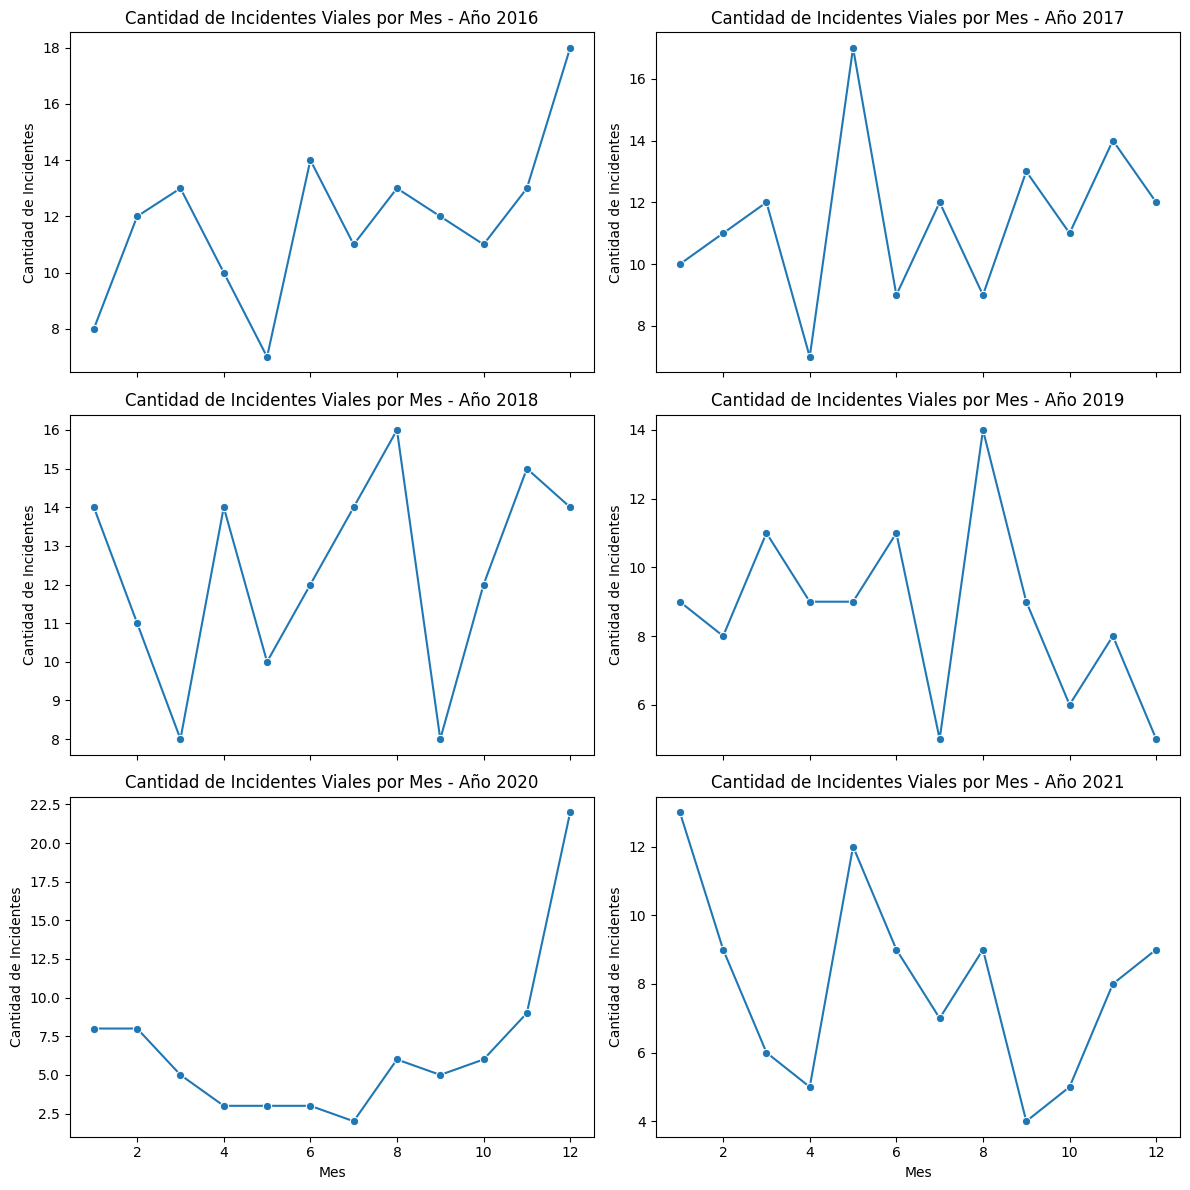

In [ ]:
años = df_siniestros["Año"].unique()
n_filas = (len(años) + 1) // 2

fig, axs = plt.subplots(nrows=n_filas, ncols=2, figsize=(12, 4 * n_filas), sharex=True)

for i, año in enumerate(años):
    fila = i // 2
    columna = i % 2
    incidentes_por_mes_año = df_siniestros[df_siniestros["Año"] == año].groupby("Mes").size().reset_index(name="Cantidad")

    sns.lineplot(x="Mes", y="Cantidad", data=incidentes_por_mes_año, marker='o', ax=axs[fila, columna])
    axs[fila, columna].set_title(f"Cantidad de Incidentes Viales por Mes - Año {año}")
    axs[fila, columna].set_xlabel("Mes")
    axs[fila, columna].set_ylabel("Cantidad de Incidentes")

if len(años) % 2 != 0:
    fig.delaxes(axs[n_filas - 1, 1])

plt.tight_layout()
plt.show()

Las visualizaciones no revelan un patrón consistente a lo largo del año al comparar entre diferentes años.

## Tipo de calle

In [ ]:
df_siniestros["Tipo Calle"].describe()

count         707
unique          3
top       AVENIDA
freq          442
Name: Tipo Calle, dtype: object

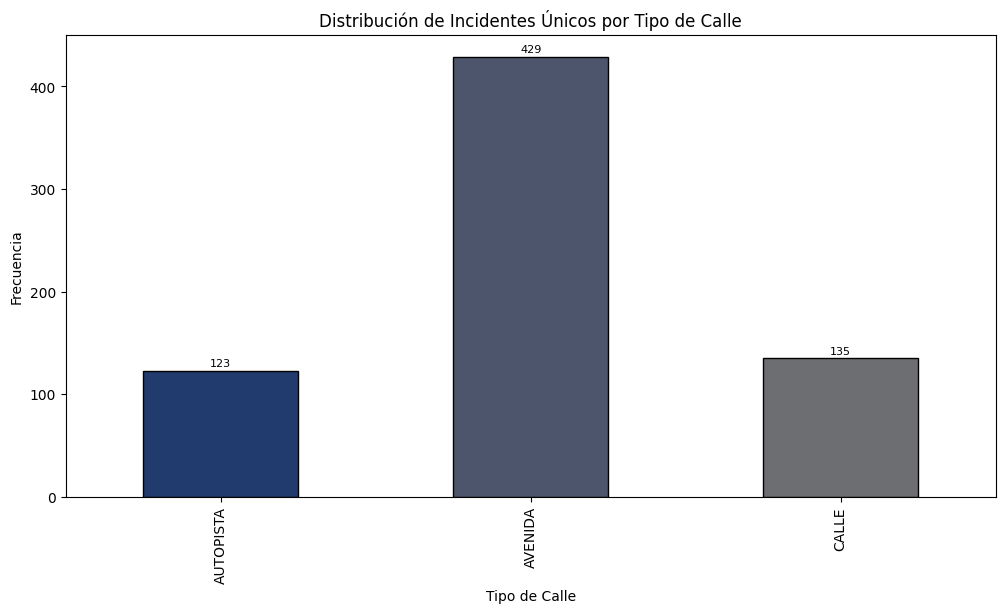

In [ ]:
incidentes_por_tipo_calle = df_siniestros.groupby("Tipo Calle")["Id"].nunique()

plt.figure(figsize=(12, 6))
a3= incidentes_por_tipo_calle.plot(kind="bar", color=sns.color_palette("cividis"), edgecolor="black")
plt.title("Distribución de Incidentes Únicos por Tipo de Calle")
plt.xlabel("Tipo de Calle")
plt.ylabel("Frecuencia")
for p in a3.patches:
    a3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
total_incidentes = np.sum(incidentes_por_tipo_calle)
porcentajes_tipo_calle = (incidentes_por_tipo_calle / total_incidentes) * 100

df_tipo_calle = pd.DataFrame({
    'Tipo Calle': incidentes_por_tipo_calle.index,
    'Frecuencia': incidentes_por_tipo_calle.values,
    'Porcentaje': porcentajes_tipo_calle.values
})

df_tipo_calle

NameError: name 'incidentes_por_tipo_calle' is not defined

La mayoría de los casos suceden en avenidas al compararse con autopisas y calles.

## Comuna

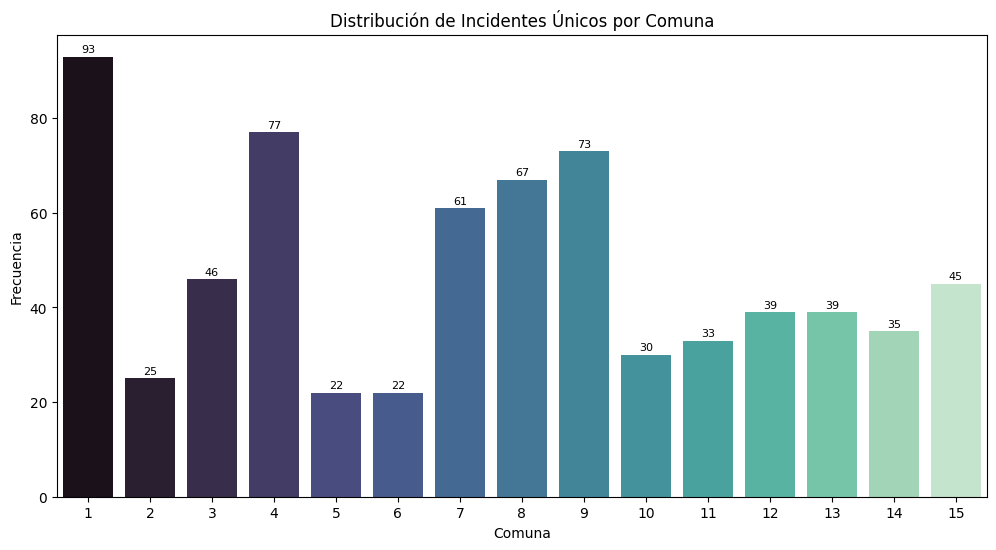

In [ ]:
incidentes_por_comuna = df_siniestros.groupby("Comuna")["Id"].nunique()

plt.figure(figsize=(12, 6))
a4= sns.countplot(x="Comuna", data=df_siniestros, palette="mako")
plt.title("Distribución de Incidentes Únicos por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Frecuencia")
for p in a4.patches:
    a4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
total_incidentes_comuna = np.sum(incidentes_por_comuna)
porcentajes_comuna = (incidentes_por_comuna / total_incidentes_comuna) * 100

df_comuna = pd.DataFrame({
    'Comuna': incidentes_por_comuna.index,
    'Porcentaje': porcentajes_comuna.values
})

df_comuna

,Comuna,Porcentaje
0,1,13.100437
1,2,3.639010
2,3,6.550218
3,4,10.771470
4,5,3.202329
5,6,3.056769
6,7,8.588064
7,8,9.461426
8,9,10.480349
9,10,4.221252


En el grafico podemos observar que la comuna que tiene la mayor cantidad de incidentes viales es la comuna 1 y l a segunda comuna con mas incidentes viales es la comuna 4.
Las dos comunas que representan el numero mas bajo de incidentes son la comuna 5 y la comuna 6 que representa el barrio de Caballito.

## Participantes

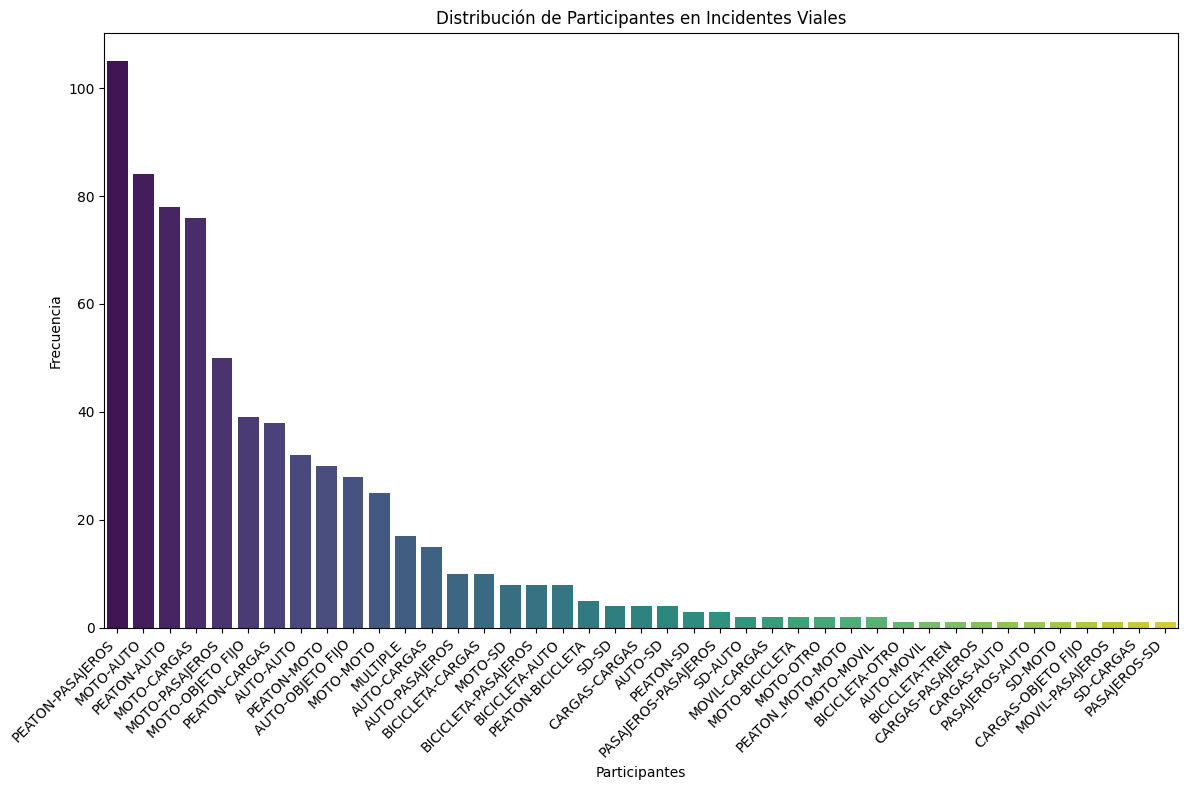

In [ ]:
participantes_counts = df_siniestros["Participantes"].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=participantes_counts.index, y=participantes_counts.values, palette="viridis")

plt.title("Distribución de Participantes en Incidentes Viales")
plt.xlabel("Participantes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
participantes_counts.head(5)

PEATON-PASAJEROS    105
MOTO-AUTO            84
PEATON-AUTO          78
MOTO-CARGAS          76
MOTO-PASAJEROS       50
Name: Participantes, dtype: int64

La mayoría de las víctimas surgen de incidentes que incluyen a peatones y pasajeros

## Victima

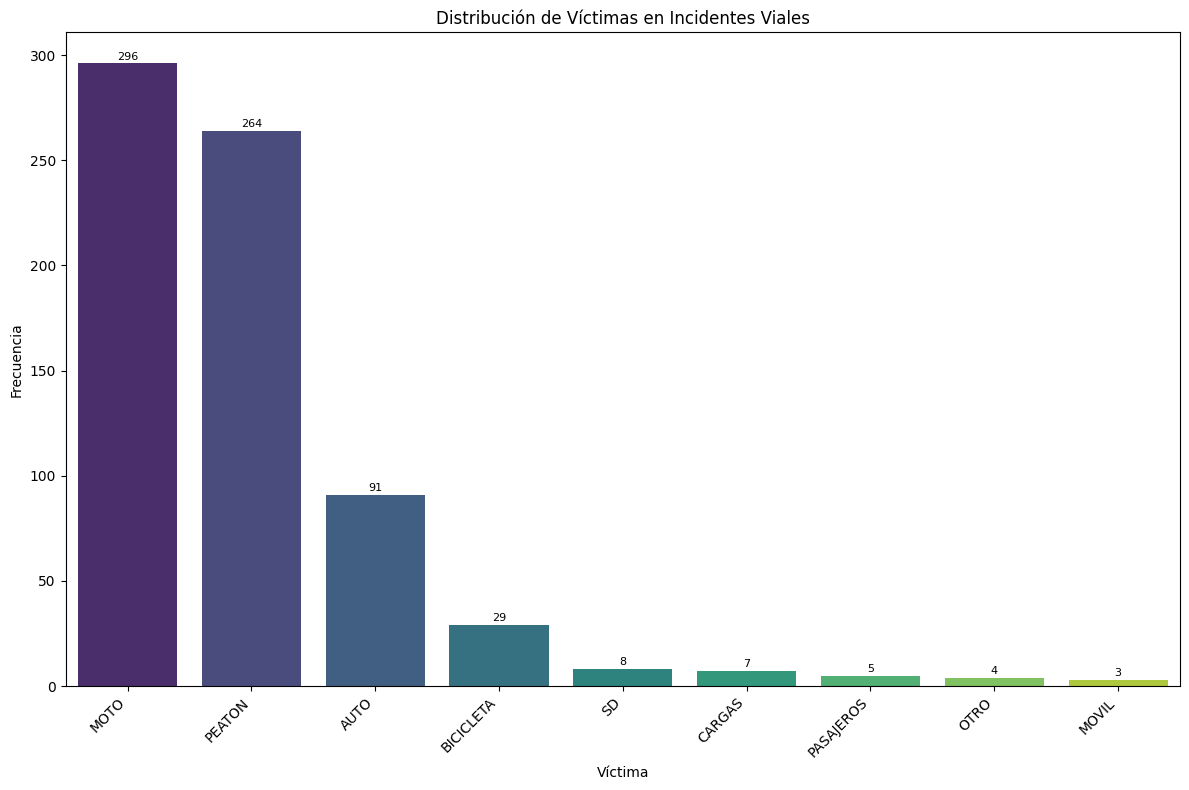

In [ ]:
victima_counts = df_siniestros["Victima"].value_counts()
plt.figure(figsize=(12, 8))
a5= sns.barplot(x=victima_counts.index, y=victima_counts.values, palette="viridis")
plt.title("Distribución de Víctimas en Incidentes Viales")
plt.xlabel("Víctima")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
for p in a5.patches:
    a5.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
total_incidentes_victima= np.sum(victima_counts)
porcentajes_victimas = (victima_counts / total_incidentes_victima) * 100

df_victimas_= pd.DataFrame({
    'Victimas': victima_counts.index,
    'Porcentaje': porcentajes_victimas.values
})

df_victimas_

,Victimas,Porcentaje
0,MOTO,41.867044
1,PEATON,37.340877
2,AUTO,12.871287
3,BICICLETA,4.101839
4,SD,1.131542
5,CARGAS,0.990099
6,PASAJEROS,0.707214
7,OTRO,0.565771
8,MOVIL,0.424328


En cuanto a las víctimas, la mayoría ingresa dentro de la variable "moto", luego en segundo lugar, "peatón".

## Acusado

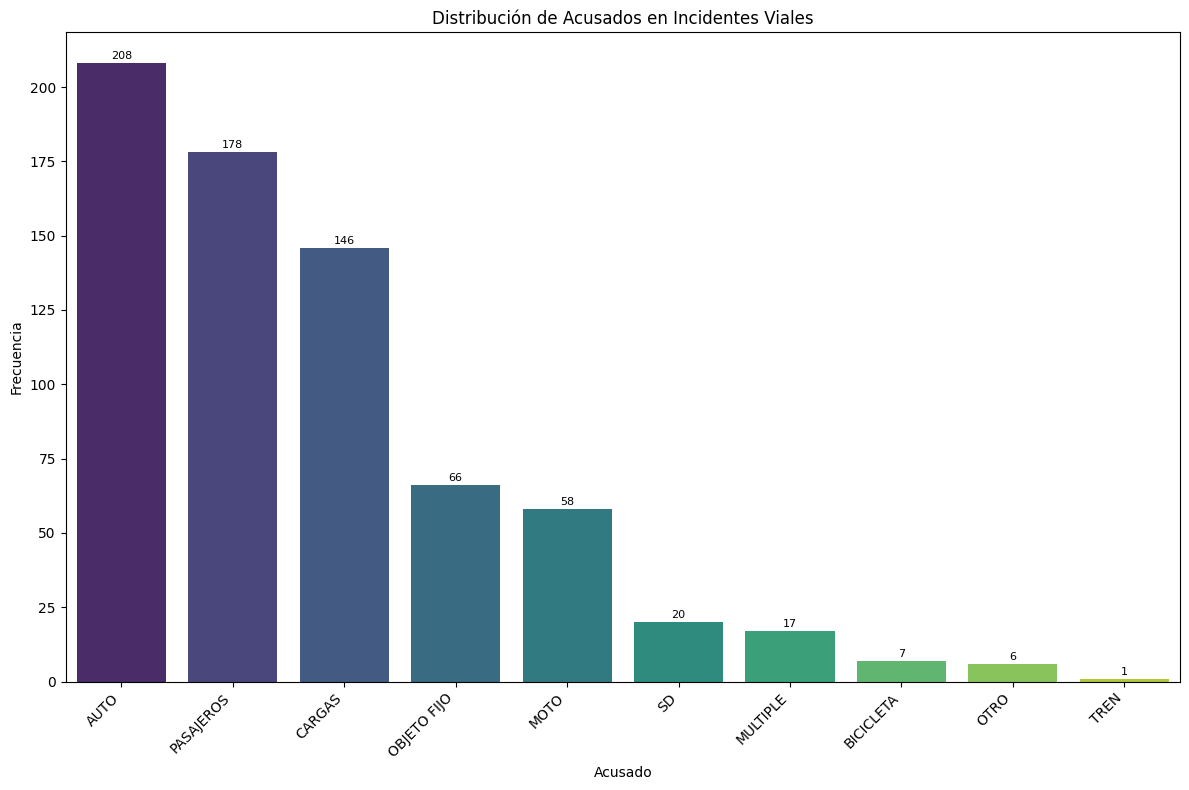

In [ ]:
acusado_counts = df_siniestros["Acusado"].value_counts()
plt.figure(figsize=(12, 8))
a6 = sns.barplot(x=acusado_counts.index, y=acusado_counts.values, palette="viridis")
plt.title("Distribución de Acusados en Incidentes Viales")
plt.xlabel("Acusado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
for p in a6.patches:
    a6.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
total_incidentes_acusado = np.sum(acusado_counts)
porcentajes_acusado = (acusado_counts / total_incidentes_acusado) * 100

df_acusado = pd.DataFrame({
    'Acusado': acusado_counts.index,
    'Porcentaje': porcentajes_acusado.values
})

df_acusado

,Acusado,Porcentaje
0,AUTO,29.420085
1,PASAJEROS,25.176803
2,CARGAS,20.650636
3,OBJETO FIJO,9.335219
4,MOTO,8.203678
5,SD,2.828854
6,MULTIPLE,2.404526
7,BICICLETA,0.990099
8,OTRO,0.848656
9,TREN,0.141443


Los 3 vehículos mas sorprendentes son 1. Auto, 2. Transporte de pasajeros, 3. Transporte de cargas.

## Dia de la semana

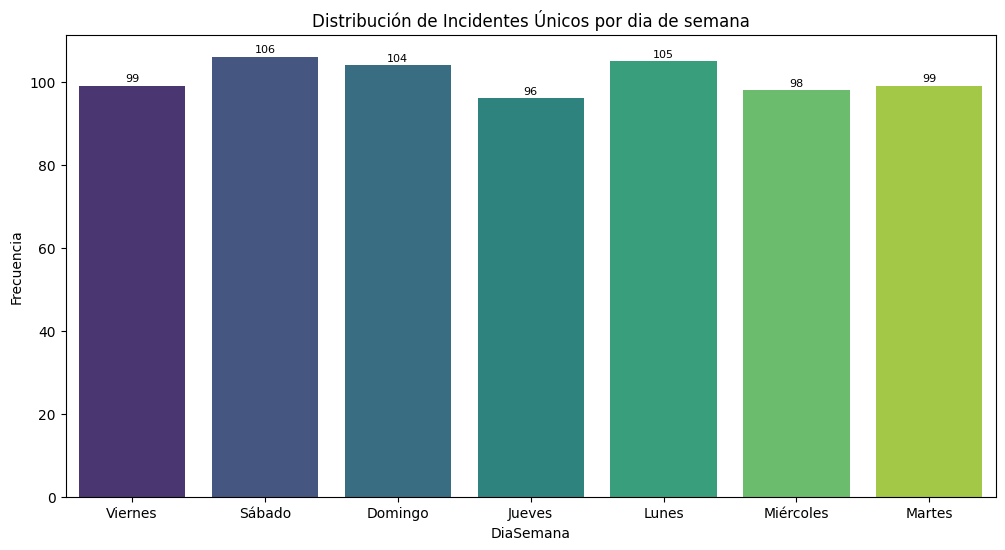

La diferencia porcentual entre el dia que menos incidentes tiene contra el dia de mayor incidentes es de: 10.638297872340425


In [ ]:
incidentes_por_dia_semana = df_siniestros.groupby("DiaSemana")["Id"].nunique()

plt.figure(figsize=(12, 6))
a8= sns.countplot(x="DiaSemana", data=df_siniestros, palette="viridis")
plt.title("Distribución de Incidentes Únicos por dia de semana")
plt.xlabel("DiaSemana")
plt.ylabel("Frecuencia")
for p in a8.patches:
    a8.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

dia_menor_incidentes = incidentes_por_dia_semana.idxmin()
dia_mayor_incidentes = incidentes_por_dia_semana.idxmax()
diferencia_porcentual = ((incidentes_por_dia_semana.max() - incidentes_por_dia_semana.min()) / incidentes_por_dia_semana.min()) * 100
print(f"La diferencia porcentual entre el dia que menos incidentes tiene contra el dia de mayor incidentes es de: {diferencia_porcentual}")


La distribución es relativamente uniforme a lo largo de la semana, a pesar de existir un aumento durante los días sábado, domingo y lunes.

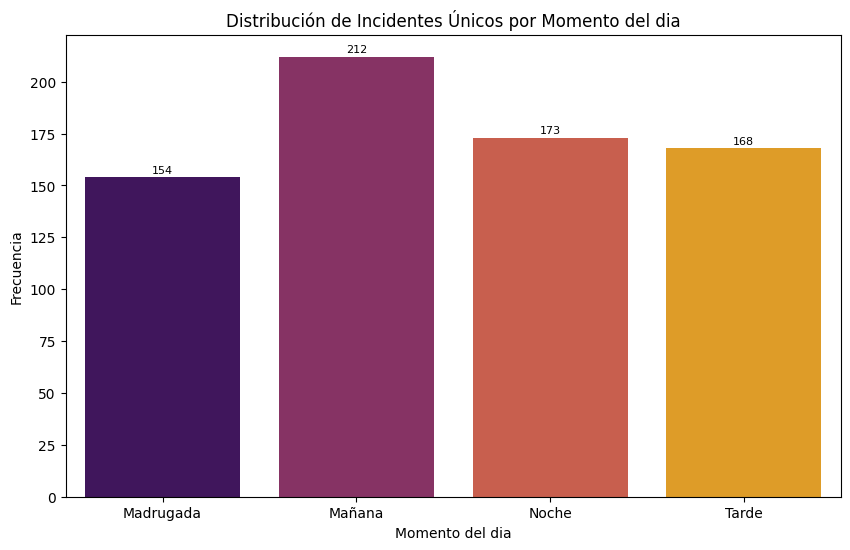

In [ ]:
incidentes_por_dia_semana = df_siniestros.groupby("MomentoDia")["Id"].nunique()

plt.figure(figsize=(10, 6))
a9= sns.countplot(x="MomentoDia", data=df_siniestros, palette="inferno")
plt.title("Distribución de Incidentes Únicos por Momento del dia")
plt.xlabel("Momento del dia")
plt.ylabel("Frecuencia")
for p in a9.patches:
    a9.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Podemos observar que la mayor cantidad de incidentes ocurre en horas de la mañana, de 6 a 12 horas. Con esto, podemos conjeturar que podría deberse a la mayor cantidad de tráfico vehícular debido al ingreso al trabajo y a la escuela.

## Rol

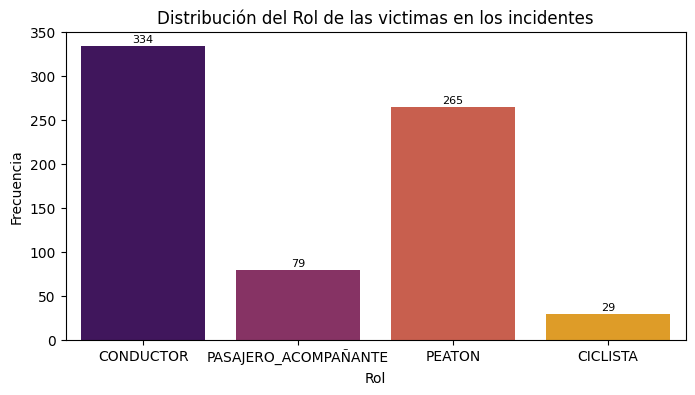

In [ ]:
plt.figure(figsize=(8, 4))
a10 = sns.countplot(x="Rol", data=df_siniestros, palette="inferno")
plt.title("Distribución del Rol de las victimas en los incidentes")
plt.xlabel("Rol")
plt.ylabel("Frecuencia")
for p in a10.patches:
    a10.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
rol = df_siniestros["Rol"].value_counts()
total_incidentes_rol = np.sum(rol)
porcentajes_rol = (rol / total_incidentes_rol) * 100

df_rol_ = pd.DataFrame({
    'Rol': rol.index,
    'Porcentaje': porcentajes_rol.values
})

df_rol_

,Rol,Porcentaje
0,CONDUCTOR,47.241867
1,PEATON,37.482320
2,PASAJERO_ACOMPAÑANTE,11.173975
3,CICLISTA,4.101839


Podemos observar que las víctimas más frecuentes son los conductores y los peatones.

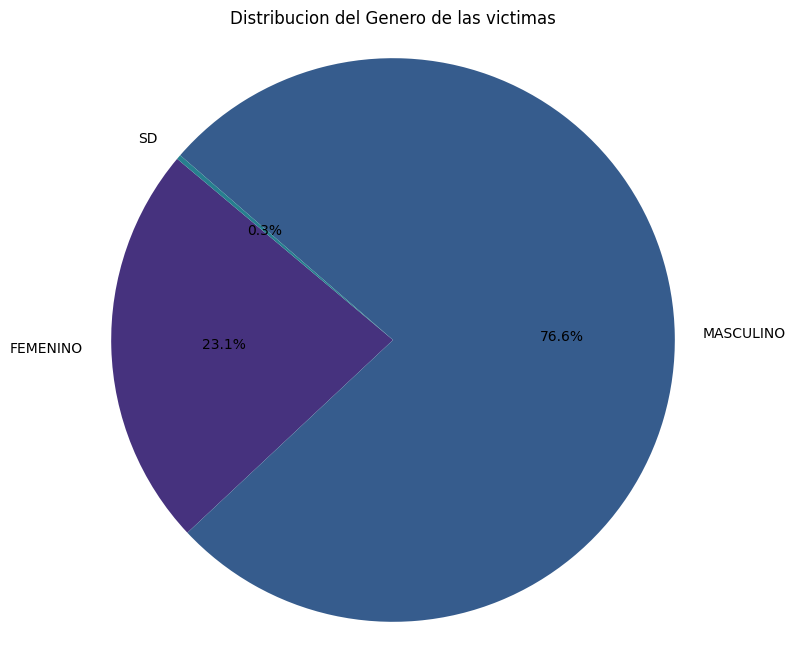

In [ ]:
victimas_genero = df_siniestros.groupby("Sexo")["Nro Victimas"].sum()
plt.figure(figsize=(8, 8))
plt.pie(victimas_genero, labels=victimas_genero.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title("Distribucion del Genero de las victimas")
plt.axis("equal")

plt.show()

In [ ]:
total_incidentes_genero= np.sum(victimas_genero)
porcentajes_genero = (victimas_genero / total_incidentes_genero) * 100

df_genero= pd.DataFrame({
    'Comuna': victimas_genero.index,
    'Porcentaje': porcentajes_genero.values
})

df_genero

,Comuna,Porcentaje
0,FEMENINO,23.097463
1,MASCULINO,76.635514
2,SD,0.267023


El género más frecuente es el másculino con el 76.63%.


## Outliers

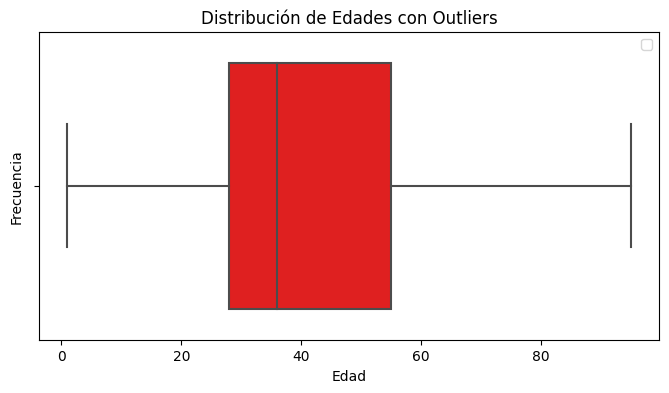

Valores atípicos en la variable 'Edad':
Empty DataFrame
Columns: [Id, Edad]
Index: []


In [ ]:
Q1 = df_siniestros["Edad"].quantile(0.25)
Q3 = df_siniestros["Edad"].quantile(0.75)
IQR = Q3 - Q1
limite_bajo = Q1 - 1.5 * IQR
limite_alto = Q3 + 1.5 * IQR
outliers_edad = df_siniestros[(df_siniestros["Edad"] < limite_bajo) | (df_siniestros["Edad"] > limite_alto)]

plt.figure(figsize=(8, 4))
sns.boxplot(x="Edad", data=df_siniestros, color="red")
sns.scatterplot(x='Edad', y=None, data=outliers_edad, color="blue", label="Outliers")
plt.title("Distribución de Edades con Outliers")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

print("Valores atípicos en la variable 'Edad':")
print(outliers_edad[['Id', 'Edad']])

## Numero de victimas

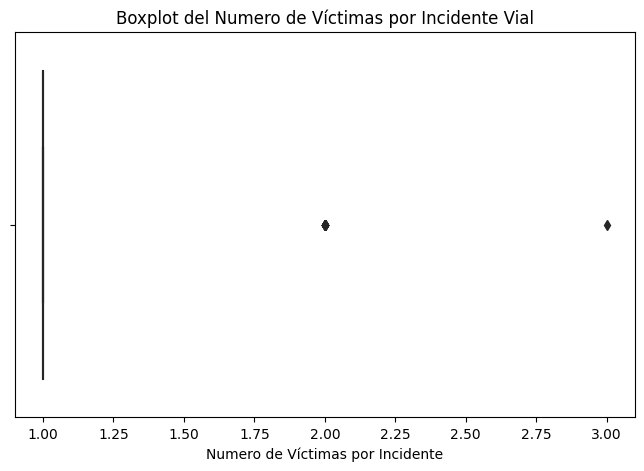

In [ ]:
max_victimas_por_incidente = df_siniestros.groupby("Id")["Nro Victimas"].max()
plt.figure(figsize=(8, 5))
sns.boxplot(x=max_victimas_por_incidente, color="green")
plt.title("Boxplot del Numero de Víctimas por Incidente Vial")
plt.xlabel("Numero de Víctimas por Incidente")
plt.show()

In [ ]:
max_victimas_por_incidente = df_siniestros.groupby("Id")["Nro Victimas"].max()
Q1_b = max_victimas_por_incidente.quantile(0.25)
Q3_b = max_victimas_por_incidente.quantile(0.75)
IQR_b = Q3_b - Q1_b
limite_bajo_b = Q1_b - 1.5 * IQR_b
limite_alto_b = Q3_b + 1.5 * IQR_b
outliers_victimas_b = max_victimas_por_incidente[(max_victimas_por_incidente < limite_bajo_b) | (max_victimas_por_incidente > limite_alto_b)]
print("Valores atípicos en el número máximo de víctimas por incidente:")
print(outliers_victimas_b)

Valores atípicos en el número máximo de víctimas por incidente:
Id
2016-0041    2
2016-0126    2
2017-0026    2
2017-0035    3
2017-0036    2
2017-0108    2
2017-0112    2
2017-0126    2
2017-0153    2
2018-0015    2
2018-0026    2
2018-0038    2
2018-0085    2
2018-0098    2
2018-0128    2
2019-0010    2
2020-0038    2
2020-0063    2
2020-0077    2
Name: Nro Victimas, dtype: int64


## Analisis de correlacion

Realizaremos el analisis de correlacion con el objetivo de entender la relación estadística entre dos o más variables en un conjunto de datos.

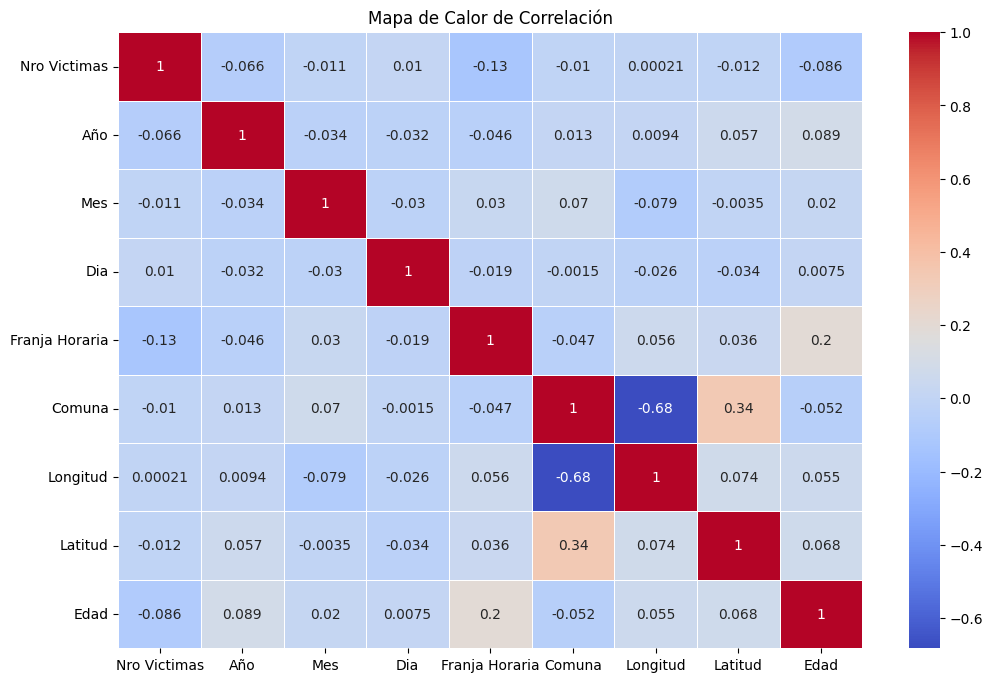

In [ ]:
columnas_mapa_calor = ["Nro Victimas", "Año", "Mes", "Dia", "Franja Horaria", "Comuna", "Longitud", "Latitud", "Edad"]
df_mapa_calor = df_siniestros[columnas_mapa_calor]
matriz_correlacion = df_mapa_calor.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

## Analisis Bivariable

Relacion entre Comuna y Numero de victimas

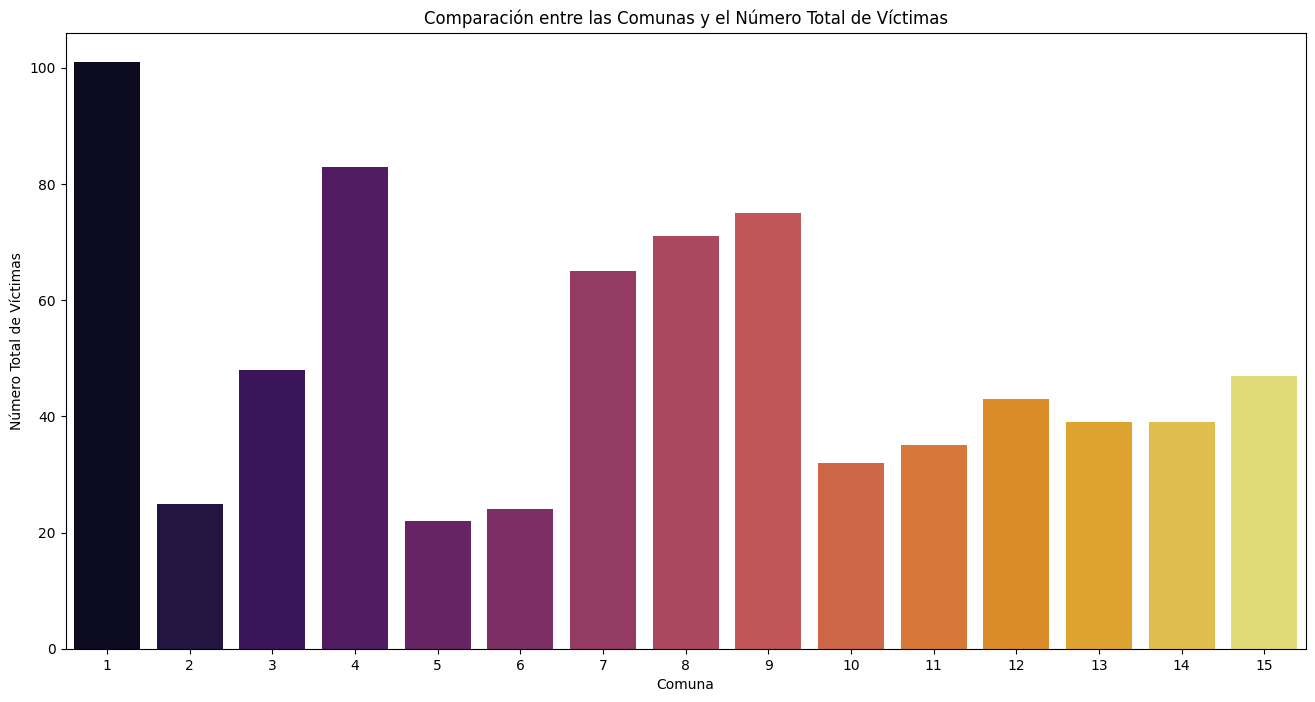

In [ ]:
victimas_por_comuna = df_siniestros.groupby("Comuna")["Nro Victimas"].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x="Comuna", y="Nro Victimas", data=victimas_por_comuna, palette='inferno')
plt.title("Comparación entre las Comunas y el Número Total de Víctimas")
plt.xlabel("Comuna")
plt.ylabel("Número Total de Víctimas")
plt.show()

La comuna que tiene un mayor numero de víctimas es la comuna 1 que abarca mas de un barrio e incluye a Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.

## Relacion entre Tipo de Calle y Comuna

<Figure size 1200x800 with 0 Axes>

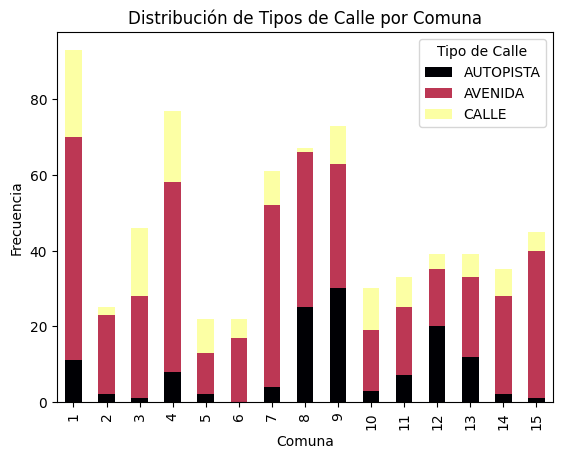

In [ ]:
df_comuna_tipo_calle = df_siniestros.groupby(['Comuna', 'Tipo Calle']).size().unstack()

plt.figure(figsize=(12, 8))
df_comuna_tipo_calle.plot(kind='bar', stacked=True, colormap='inferno')
plt.title('Distribución de Tipos de Calle por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Calle')
plt.show()

## Relacion entre el Tipo de Calle y el Dia de la Semana

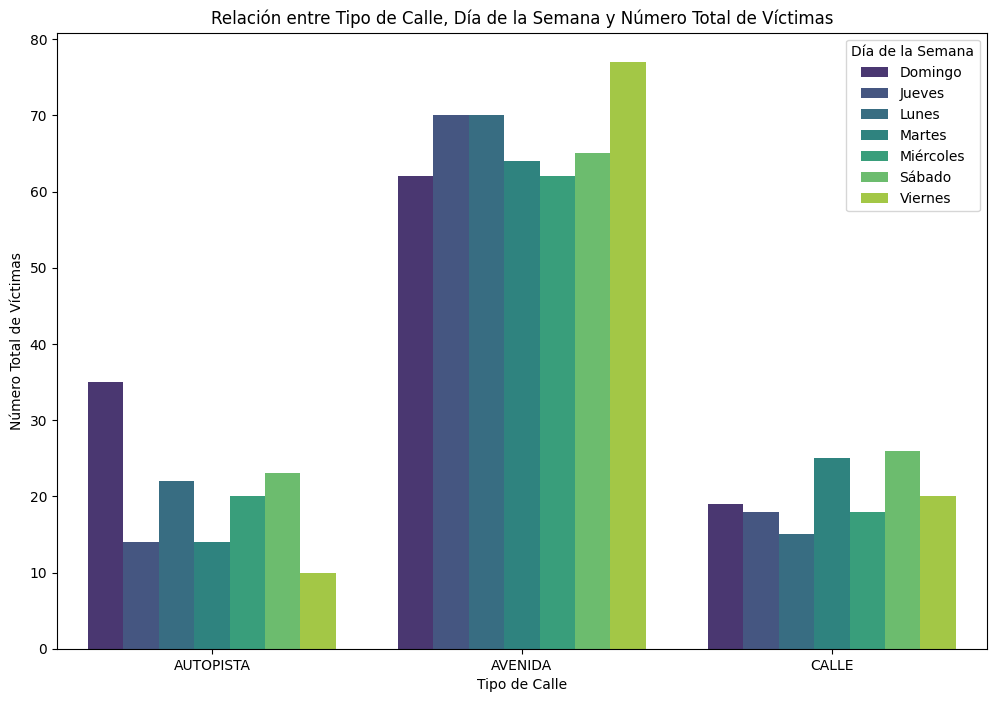

In [ ]:
victimas_por_tipo_calle_y_dia = df_siniestros.groupby(["Tipo Calle", "DiaSemana"])["Nro Victimas"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="Tipo Calle", y="Nro Victimas", hue="DiaSemana", data=victimas_por_tipo_calle_y_dia, palette="viridis")
plt.title("Relación entre Tipo de Calle, Día de la Semana y Número Total de Víctimas")
plt.xlabel("Tipo de Calle")
plt.ylabel("Número Total de Víctimas")
plt.legend(title="Día de la Semana")
plt.show()

## Relacion entre el Momento del dia y la Edad

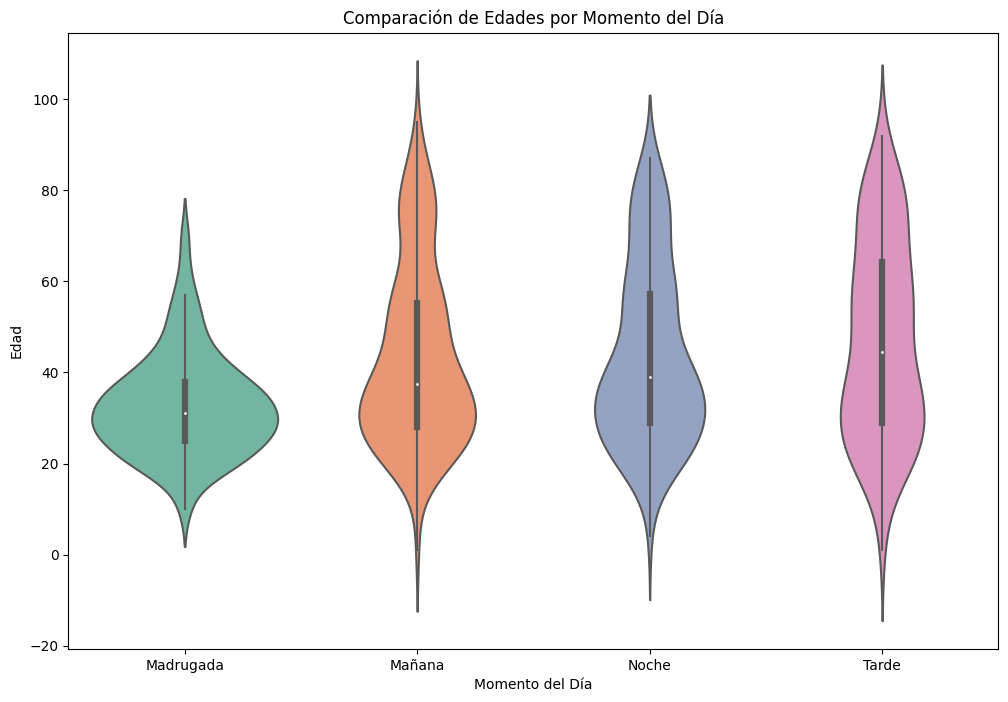

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='MomentoDia', y='Edad', data=df_siniestros, palette='Set2')
plt.title('Comparación de Edades por Momento del Día')
plt.xlabel('Momento del Día')
plt.ylabel('Edad')
plt.show()

No importa el momento del día, la edad de las victimas se encuentra dentro del rango de 20 a 40 años.

## Relacion entre el dia de semana y el sexo de la victima

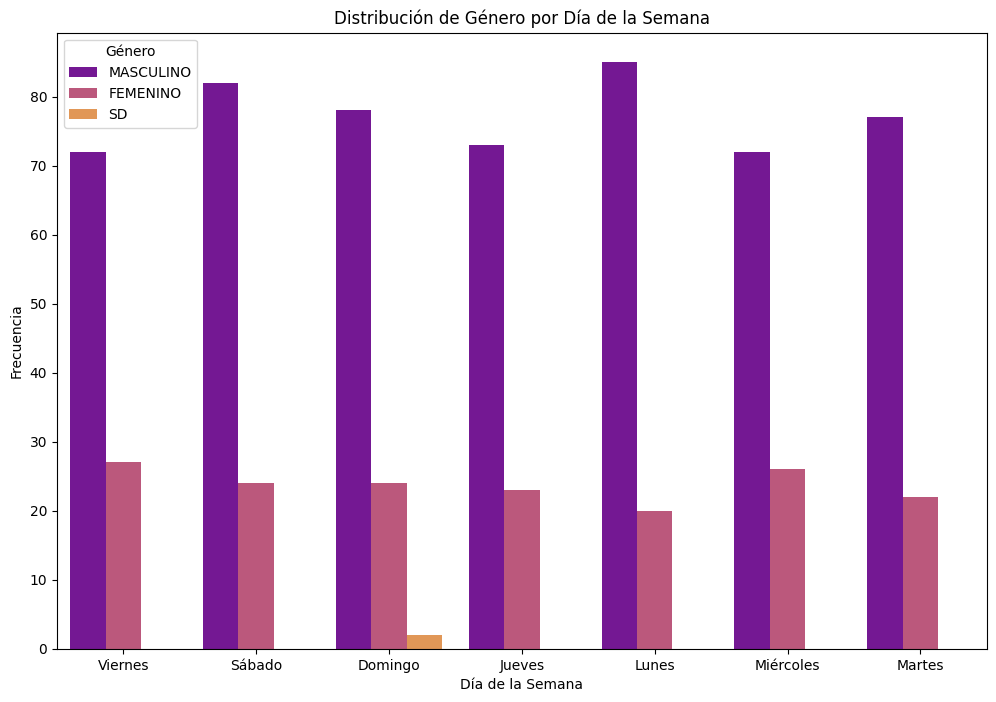

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="DiaSemana", hue="Sexo", data=df_siniestros, palette="plasma")
plt.title("Distribución de Género por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Frecuencia")
plt.legend(title="Género")
plt.show()

## Relacion entre Año y Sexo

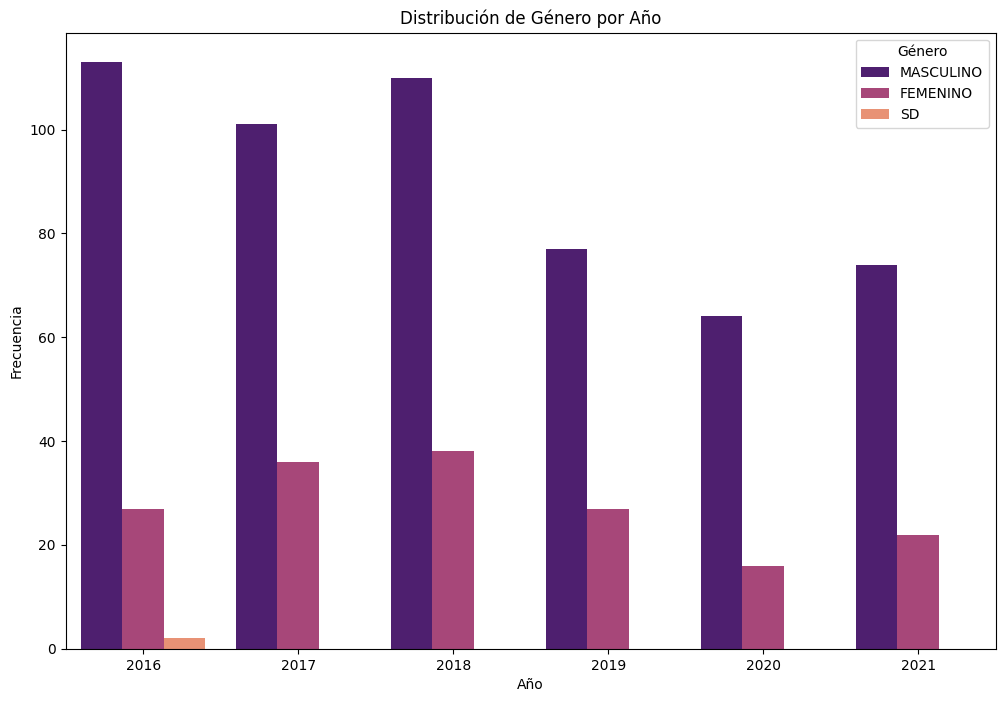

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Año", hue="Sexo", data=df_siniestros, palette="magma")
plt.title("Distribución de Género por Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.legend(title="Género")
plt.show()

## Relacion entre Rol y Edad

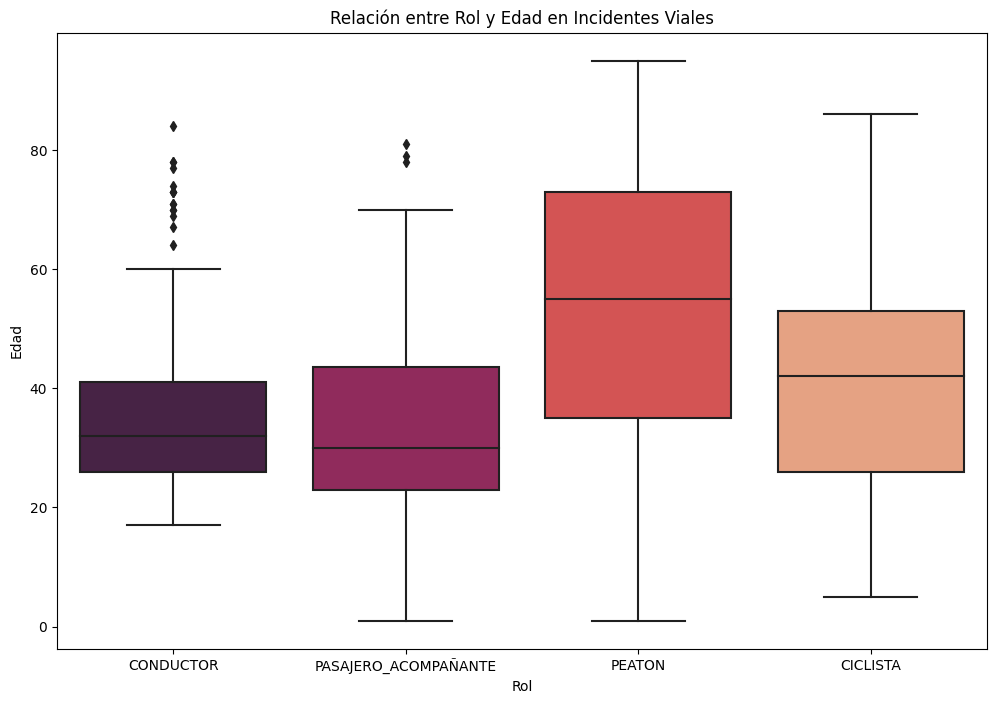

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rol', y='Edad', data=df_siniestros, palette='rocket')
plt.title("Relación entre Rol y Edad en Incidentes Viales")
plt.xlabel("Rol")
plt.ylabel("Edad")
plt.show()

Los conductores de automóviles como los pasajeros acompañantes presentan edades similares, alrededor de los 35 años.

## Relacion entre Victima y Acusado

<Figure size 1200x800 with 0 Axes>

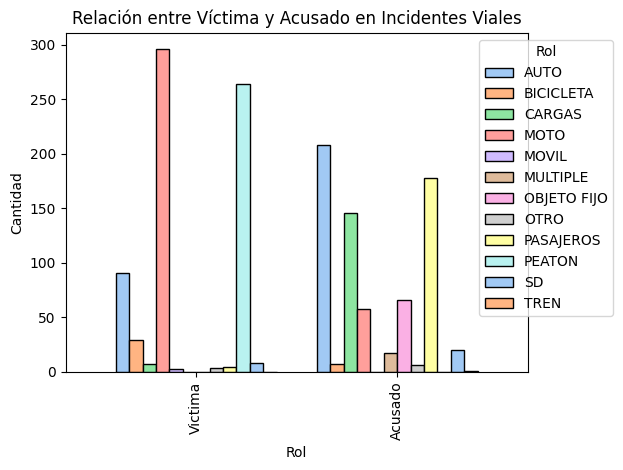

In [ ]:
top_n_categories = 10
top_victima_categories = df_siniestros["Victima"].value_counts().head(top_n_categories).index
top_acusado_categories = df_siniestros["Acusado"].value_counts().head(top_n_categories).index
filtered_df = df_siniestros[df_siniestros["Victima"].isin(top_victima_categories) & df_siniestros["Acusado"].isin(top_acusado_categories)]
victima_acusado_counts = filtered_df[["Victima", "Acusado"]].apply(lambda x: x.value_counts()).T.fillna(0)
sns.set_palette("pastel", n_colors=top_n_categories)
plt.figure(figsize=(12, 8))
victima_acusado_counts.plot(kind='bar', width=0.8, edgecolor='black')
plt.title("Relación entre Víctima y Acusado en Incidentes Viales")
plt.xlabel("Rol")
plt.ylabel("Cantidad")
plt.legend(title="Rol",bbox_to_anchor=(1.2, 1), loc='upper right')
plt.tight_layout()
plt.show()

La principal víctima de los incidentes viales son las motos; sin embargo, no se presentan con mucha frecuencia como acusados. Son muy pocas veces señalados como responsables.
La segunda víctima de los incidentes viales son los peatones. En comparación con los acusados, casi nunca provocan el accidente.
En cuanto a los autos como víctimas, representan la mayor cantidad de acusados en comparación con las otras categorías.

## Relacion entre Rol y Genero

<Figure size 1000x600 with 0 Axes>

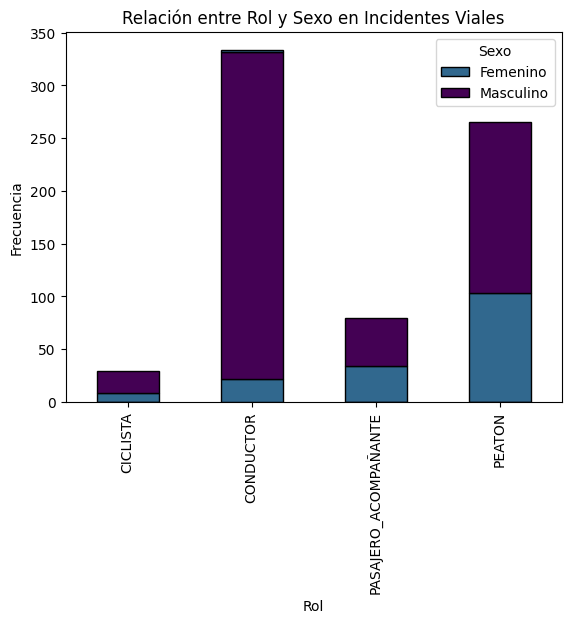

In [ ]:
df_rol_sexo = df_siniestros.groupby(['Rol', 'Sexo']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
df_rol_sexo.plot(kind='bar', stacked=True, color=['#31688e', '#440154'], edgecolor='black')
plt.title('Relación entre Rol y Sexo en Incidentes Viales')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', loc='upper right', labels=['Femenino', 'Masculino'])
plt.show()

La mayor cantidad de victimas pertenecen al genero masculino

## RESUMEN



La mayoría de las víctimas de incidentes viales se concentran en el rango de edad de 20 a 40 años.

Los incidentes con un número reducido de víctimas son mucho más comunes que aquellos con un elevado número de víctimas.

Se registran mayores incidentes en Diciembre y disminución en Abril.

Las avenidas, con mayor tráfico y velocidad, presentan una mayor incidencia de incidentes que las calles y autopistas.

Los incidentes involucrando peatones y pasajeros son frecuentes, destacando la vulnerabilidad de estos grupos.

Los automóviles, especialmente aquellos que transportan pasajeros, son los más comúnmente acusados en incidentes viales.

Los incidentes son más frecuentes durante las horas pico del tráfico.

Los hombres son las principales víctimas de incidentes viales.

Las comunas 1, 4, 9 y 8 presentan el mayor número de víctimas, sugiriendo que estas áreas tienen un mayor riesgo de accidentes de tránsito.